In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data[:, :2]  # we only take the first two features.
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=123, stratify=y)

In [2]:
import numpy as np
from collections import Counter

class OneRule:
    def __init__(self):
        self.best_feature = None
        self.best_rule = None
        self.best_class_for_value = {}

    def fit(self, X, y):
        num_features = X.shape[1]
        min_error = float('inf')  # Inicializar com um valor alto para minimizar

        # Para cada atributo
        for feature in range(num_features):
            class_for_value = {}  # Dicionário para armazenar as regras para cada valor
            error_count = 0

            # Obter todos os valores únicos do atributo
            unique_values = np.unique(X[:, feature])

            # Para cada valor do atributo
            for value in unique_values:
                # Contar a frequência de cada classe para o valor atual
                indices = X[:, feature] == value
                most_common_class = Counter(y[indices]).most_common(1)[0][0]  # Classe mais frequente

                # Formar uma regra que atribui a classe mais frequente a este valor
                class_for_value[value] = most_common_class

                # Calcular os erros para esta regra
                error_count += np.sum(y[indices] != most_common_class)

            # Calcular a taxa de erro de classificação das regras para este atributo
            error_rate = error_count / len(y)

            # Escolher as regras com a menor taxa de erro de classificação
            if error_rate < min_error:
                min_error = error_rate
                self.best_feature = feature
                self.best_rule = class_for_value

    def predict(self, X):
        # Realiza a previsão usando a melhor regra identificada no treinamento
        y_hat = np.array([
            self.best_rule.get(value, 0)  # 0 como valor padrão caso o valor não esteja na regra
            for value in X[:, self.best_feature]
        ])
        return y_hat

    def score(self, X, y):
        y_hat = self.predict(X)
        accuracy = np.sum(y == y_hat) / np.size(y)
        return accuracy


In [11]:
model = OneRule()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
model.score(X_train,y_pred)

1.0

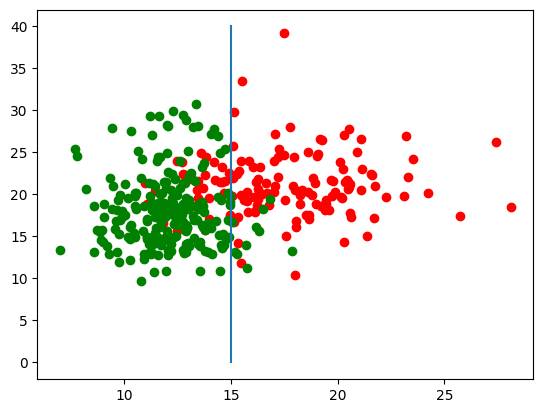

In [12]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g')

plt.plot([15, 15], [0, 40])

In [ ]:
accuracy_score(y_train, y_pred)

0.45144356955380577